# Einflussfaktoren auf die Fahrzeugflotten in deutschen Landkreisen

In [1]:
import sys
import os

sys.path.insert(0, os.path.abspath('..'))

from src.report_utils import *

## Einleitung und Daten

### Hintergrund und Motivation
Die Reduktion von Emissionen und die Förderung umweltfreundlicher Fahrzeuge sind zentrale Ziele der Verkehrspolitik. Die Einführung neuer Emissionsvorschriften, wie die Euro6-Norm, sowie die Verbreitung neuer Technologien, wie Elektrofahrzeuge und Plug-in-Hybride, haben das Potenzial, die Zusammensetzung der Fahrzeugflotten in den Landkreisen erheblich zu beeinflussen. Gleichzeitig können sozioökonomische Faktoren wie das verfügbare Einkommen pro Einwohner und die Unfallrate eine Rolle bei der Erneuerung der Fahrzeugflotten spielen.

### These
Die gesetzliche Einführung neuer Emissionsvorschriften wird voraussichtlich einen signifikanten Einfluss auf die Bestandsflotte haben. Es wird erwartet, dass der Anteil von Euro4-Fahrzeugen in Landkreisen mit einem hohen Anteil neuer Technologien (wie Plug-in-Hybriden und Elektrofahrzeugen) abnimmt. Gleichzeitig könnten sozioökonomische Faktoren wie das verfügbare Einkommen und die Unfallrate ebenfalls eine Rolle bei der Erneuerung der Fahrzeugflotten spielen. In Landkreisen mit einer älteren Fahrzeugflotte, die durch einen hohen Anteil von Fahrzeugen der Emissionsgruppen Euro2 und Euro3 gekennzeichnet ist, wird jedoch erwartet, dass der Anteil von Euro4-Fahrzeugen trotz neuer Emissionsvorschriften und Technologien robust bleibt.

### Forschungsfrage und Ziel des Modells
Welche Faktoren beeinflussen den Anteil von Euro4-Fahrzeugen in deutschen Landkreisen und wie stark ist dieser Einfluss?

Das multiple lineare Regressionsmodell soll dazu verwendet werden, die folgenden Fragen zu beantworten:
 - Identifikation relevanter Prädiktoren: Welche Variablen haben einen signifikanten Einfluss auf den Anteil von Euro4-Fahrzeugen?
 - Quantifizierung des Einflusses: Wie stark ist der Einfluss der identifizierten Prädiktoren auf den Anteil von Euro4-Fahrzeugen?
 - Modellgüte und Generalisierbarkeit: Wie gut erklärt das Modell die Varianz im Anteil von Euro4-Fahrzeugen und wie gut generalisiert es auf neue Daten?

### Datenbeschreibung

Für die Analyse soll ein Gesamt-Datensatz aus den folgenden vier Datenquellen erstellt werden:
1. Daten über Fahrzeugbestand
2. Bevölkerungsdaten
3. Daten über Einkommen der privaten Haushalte
4. Straßenverkehrsunfälle

Jede dieser Datenquellen ist nicht für jedes Jahr verfügbar. Eine gemeinsame Schnittmenge existiert für das Jahr 2019, in dem alle Teil-Datensätze erhoben wurden. Daher wird der Gesamt-Datensatz auf das Jahr 2019 beschränkt.

Vorteile der Beschränkung auf das Jahr 2019
- Vermeidung von Zeitabhängigkeiten: Durch die Beschränkung auf ein Jahr werden zeitliche Abhängigkeiten und Trends eliminiert, was die Modellierung vereinfacht.
- Konsistenz der Daten: Alle Datenquellen sind für das Jahr 2019 verfügbar, was eine konsistente und vollständige Datenbasis gewährleistet.
- Fokus auf Querschnittsdaten: Für ein multiples lineares Regressionsmodell kann es sinnvoll sein, sich auf Querschnittsdaten zu konzentrieren, um die Einflüsse der verschiedenen Prädiktoren auf die Zielvariable zu isolieren.

Die Rohdaten für dieses Projekt sind im Projektverzeichnis unter `data/raw` abgelegt. Von dort aus müssen sie zur weiteren Bearbeitung eingelesen werden.

**1. Daten über Fahrzeugbestand (nach Kraftstoffart und Emissionsgruppen)**
- Quelle: [Statistik des Kraftfahrzeug- und Anhängerbestandes, Statistisches Bundesamt, Code: 46251-0021](https://www-genesis.destatis.de/genesis/online/data)
- Beschreibung der Beobachtungen im Datensatz: Vom Kraftfahrt-Bundesamt werden aus Meldungen der Kraftfahrzeug-Zulassungsstellen Statistiken über den Bestand an Kraftfahrzeugen und Anhängern (jährlich), Neuzulassungen (monatlich), Besitzumschreibungen (monatlich) und Löschungen (jährlich) durchgeführt. Die statistischen Auswertungen umfassen alle nach der Straßenverkehrs-Zulassungs-Ordnung (StVZO) in Deutschland zugelassenen bzw. angemeldeten Fahrzeuge, denen ein amtliches Kennzeichen zugeteilt wurde. Mit einbezogen sind Fahrzeuge, die vorübergehend stillgelegt wurden sowie Fahrzeuge des Bundesgrenzschutzes (BGS) und des Technischen Hilfswerkes (THW). Dagegen sind nicht einbezogen die Fahrzeuge der Bundeswehr sowie Fahrzeuge mit rotem Kennzeichen und mit Ausfuhrkennzeichen.
- Datenerhebung: Dem Kraftfahrtbundesamt (KBA) obliegt die statistische Bearbeitung der Datenmeldungen der Zulassungsbehörden und der Haftpflichtversicherungen (Kfz mit Versicherungs-kennzeichen) sowie des Zentralen Fahrzeugregisters (ZFZR). Es handelt sich dabei um Sekundärstatistiken, denen die gemeldeten Kraftfahrzeuge und Kraftfahrzeuganhänger mit deren Halterangaben zugrunde liegen.
- Variablen:
    - Landkreise (476 Merkmalsausprägungen)
    - Kraftstoffarten (7 Merkmalsausprägungen je Landkreis ohne Aggregation `Insgesamt`)
    - Emissionsgruppen (9 Merkmalsausprägungen je Kraftstoffart ohne Aggregation `Insgesamt`)
    - Anzahl der Fahrzeuge (je Emissionsgruppe, Kraftstoffart, Landkreis)

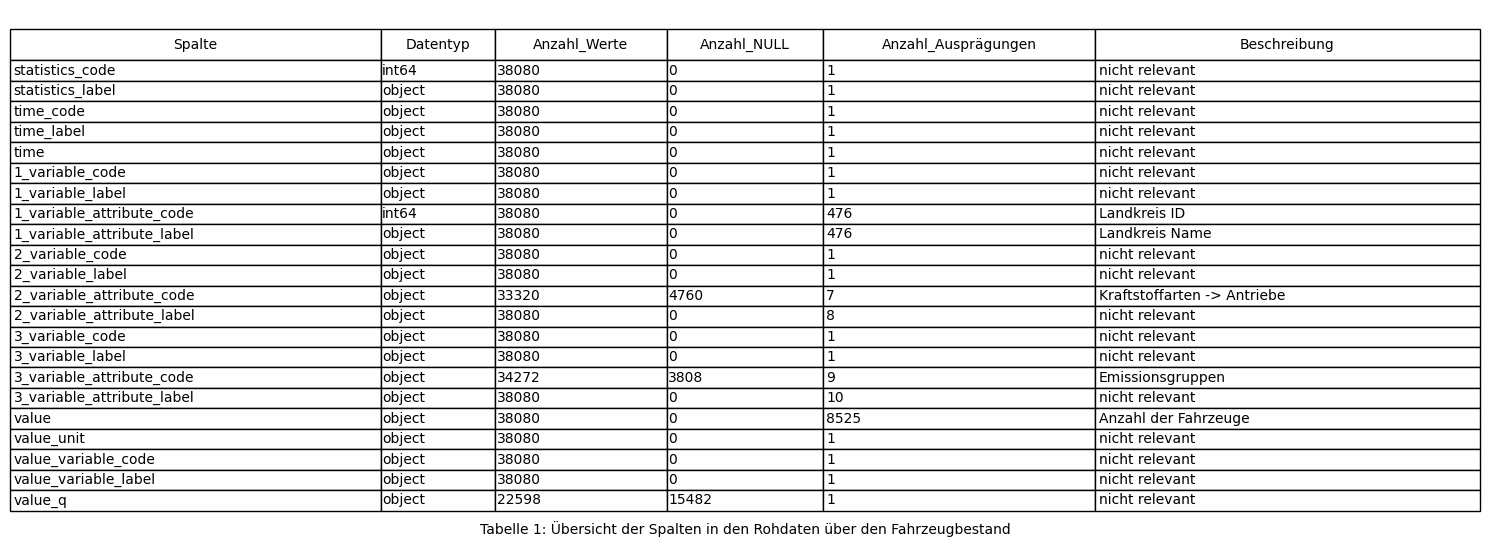

In [2]:
create_info_figure(df_kfz, 'Tabelle 1: Übersicht der Spalten in den Rohdaten über den Fahrzeugbestand')

**2. Bevölkerungsdaten**
- Quelle: [Bevölkerung am Hauptwohnort nach Altersgruppen und Geschlecht, Regionalstatistik, Code: 12211-Z-03](https://www.regionalstatistik.de/genesis/online/)
- Beschreibung der Beobachtungen im Datensatz: Für die Darstellung von Ergebnissen des Mikrozensus auf Individualebene - ohne Bezug zum Haushalts- und Lebensformkontext - wird die "Bevölkerung am Ort der alleinigen bzw. Hauptwohnung" zu Grunde gelegt. Zur "Bevölkerung" gehören nach diesem Bevölkerungsbegriff alle Personen mit nur einer Wohnung sowie Personen mit mehreren Wohnungen am Ort ihrer Hauptwohnung. Dies ist die vorwiegend genutzte Wohnung einer Person. Aus melderechtlichen Gründen werden Soldatinnen und Soldaten im Grundwehrdienst oder auf Wehrübung der Wohngemeinde vor ihrer Einberufung zugeordnet. Entsprechend wird bei Patientinnen und Patienten in Krankenhäusern sowie bei Personen in Untersuchungshaft verfahren. Berufssoldatinnen und Berufssoldaten, Soldatinnen und Soldaten auf Zeit, Angehörige des Bundesgrenzschutzes und der Bereitschaftspolizei in Gemeinschaftsunterkünften werden ebenso wie die Strafgefangenen sowie alle Dauerinsassen von Gemeinschaftsunterkünften und das in diesen Unterkünften wohnende Personal sowohl in den Gemeinden, die diese Unterkünfte beherbergen, als auch in den Gemeinden, in denen sie evtl. einen weiteren Wohnsitz haben, erfasst. Angehörige der ausländischen Stationierungsstreitkräfte sowie der ausländischen diplomatischen und konsularischen Vertretungen mit ihren Familienangehörigen werden grundsätzlich nicht statistisch ermittelt.
- Datenerhebung: Mikrozensus auf Individualebene aus Meldungen der Einwohnermeldeämter
- Variablen:
    - Landkreise (489 Merkmalsausprägungen; Aggregate: Bundesländer, Deutschland)
    - Altersgruppen (4 Merkmalsausprägungen je Landkreis ohne Aggregation `Insgesamt`)
    - Geschlecht (2 Merkmalsausprägungen je Altersgruppe ohne Aggregation `Insgesamt`)
    - Anzahl der Personen in Tausend (je Geschlecht, Altersgruppe, Landkreis)

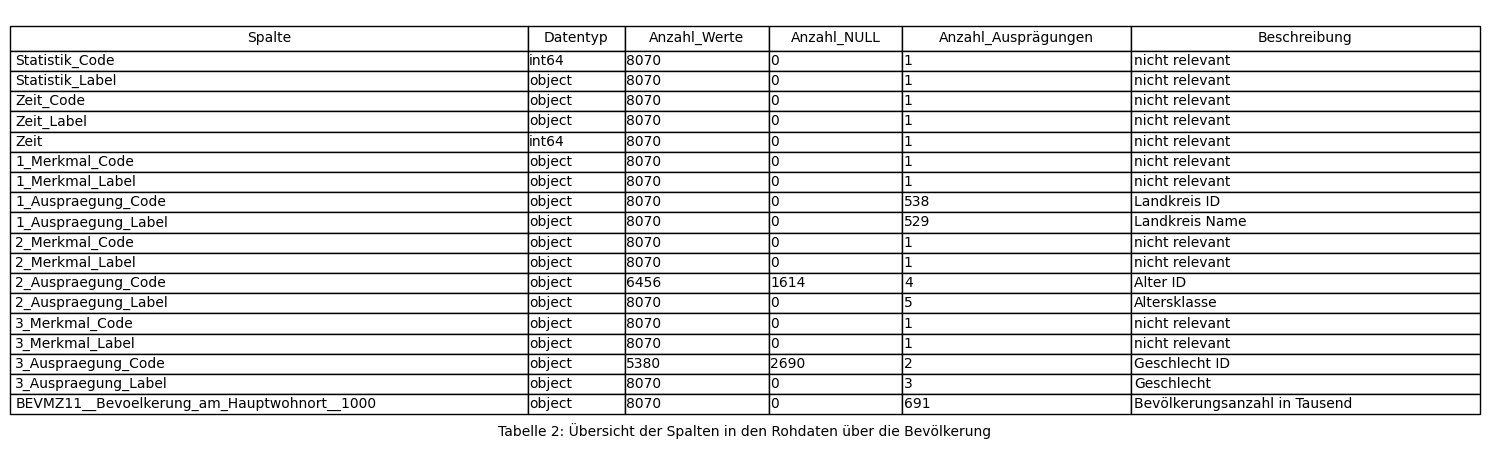

In [3]:
create_info_figure(df_pop, 'Tabelle 2: Übersicht der Spalten in den Rohdaten über die Bevölkerung')

Die Zahlen in der obigen Tabelle verdeutlichen erhebliche Unstimmigkeiten im Datensatz. Besonders auffällig ist die Diskrepanz in der Anzahl der Landkreis-IDs (538), die von der in der Datenbeschreibung angegebenen Anzahl abweicht. Darüber hinaus gibt es Unterschiede zwischen der Anzahl der Landkreisnamen (529) und der Landkreis-IDs (538). Dies weist auf eine inkonsistente Datenstruktur hin. Die Tatsache, dass es 529 Landkreisnamen, aber 538 IDs gibt, impliziert, dass gleichnamige Landkreise unter derselben ID zusammengefasst sein müssten. Diese Inkonsistenz erfordert eine gezielte Berücksichtigung bei der Datenaufbereitung.

Darüber hinaus ist der Datensatz unvollständig. Bei einer vollständigen Erhebung wären inklusive Aggregation ("+1") für 489 Landkreise, jeweils aufgeschlüsselt nach (4+1) Altersgruppen und (2+1) Geschlechterkategorien, bis zu 7335 Bevölkerungsanzahl-Ausprägungen zu erwarten gewesen. Bei der Analyse der .csv-Datei wurde festgestellt, dass insbesondere auf der tiefsten Granularitätsebene häufig Daten fehlen.

Um diese Unstimmigkeiten und Lücken zu adressieren, wird bei der Datenaufbereitung auf die Granularität verzichtet, sodass lediglich die Gesamtbevölkerungszahlen berücksichtigt werden. Außerdem werden ausschließlich Landkreise einbezogen, deren IDs auch im Datensatz für den Fahrzeugbestand vorhanden sind.

**3. Daten über Einkommen der privaten Haushalte**
- Quelle: [Verfügbares Einkommen je Einwohner, Regionalstatistik, Code: AI-S-01](https://www.regionalstatistik.de/genesis/online/)
- Beschreibung der Beobachtungen im Datensatz: Verfügbares Einkommen der privaten Haushalte einschließlich privater Organisationen ohne Erwerbszweck je Einwohnerin bzw. Einwohner in EUR. Der Indikator gibt Auskunft über den (monetären) Wohlstand der Bevölkerung und ist als der durchschnittliche Betrag zu verstehen, der je Einwohnerin bzw. Einwohner für Konsum- und Sparzwecke zur Verfügung steht. Für die Berechnung des Indikators „Verfügbares Einkommen der privaten Haushalte einschließlich privater Organisationen ohne Erwerbszweck je Einwohnerin bzw. Einwohner in EUR“ wird der Wert des Verfügbaren Einkommens in jeweiligen Preisen im Jahr durch die Zahl der Einwohnerinnen und Einwohner im Jahresdurchschnitt dividiert. Für die Berechnung des Indikators 'Verfügbares Einkommen der privaten Haushalte einschließlich privater Organisationen ohne Erwerbszweck je Einwohnerin bzw. Einwohner in EUR' wird die jahresdurchschnittliche Zahl der Einwohnerinnen und Einwohner auf Basis des Zensus 2011 herangezogen. Die durchschnittliche Jahresbevölkerung ist das arithmetische Mittel aus Jahresanfangs- und Jahresendbestand. Bei diesen Ergebnissen handelt es sich um Ergebnisse der Revision 2014 der Volkswirtschaftlichen Gesamtrechnungen der Länder. Die VGR-Generalrevision 2014 dient in erster Linie der europaweiten Einführung des neuen Europäischen Systems Volkswirtschaftlicher Gesamtrechnungen (ESVG 2010), welches eine Vielzahl von konzeptionellen Änderungen mit sich bringt. Darüber hinaus wurden sämtliche bisherigen Berechnungen und Ergebnisse überprüft sowie neue Erkenntnisse, methodische Verbesserungen und, soweit möglich, neue Datenquellen in das Rechenwerk integriert.
- Datenerhebung: Der Indikator beruht auf Daten des Arbeitskreises "Volkswirtschaftliche Gesamtrechnungen der Länder". Die Ergebnisse beziehen sich immer auf den zum jeweiligen Veröffentlichungstermin maßgeblichen Berechnungsstand.
- Variablen:
    - Landkreise (489 Merkmalsausprägungen; Aggregate: Bundesländer, Deutschland)
    - Verfügbares Einkommen je Einwohner (je Landkreis)

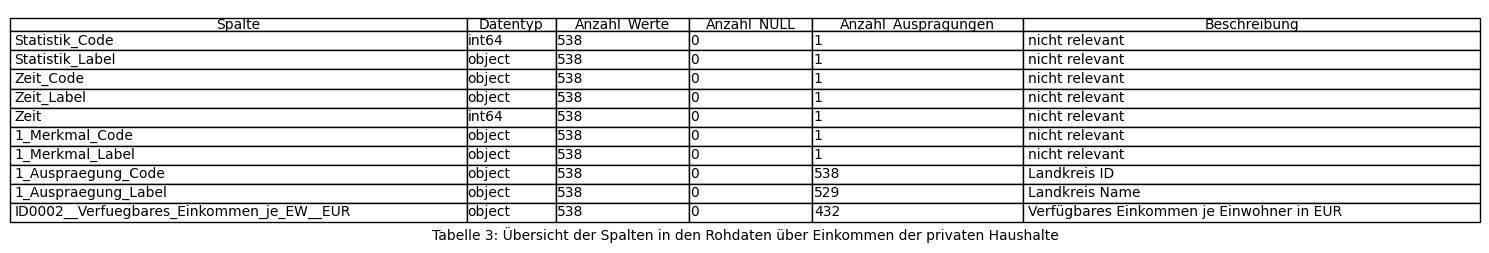

In [4]:
create_info_figure(df_vee, 'Tabelle 3: Übersicht der Spalten in den Rohdaten über Einkommen der privaten Haushalte')

**4. Straßenverkehrsunfälle**
- Quelle: [Straßenverkehrsunfälle bezogen auf Kfz, Regionalstatistik, Code: AI013-3](https://www.regionalstatistik.de/genesis/online/)
- Beschreibung der Beobachtungen im Datensatz: Der Indikator ist ein Maßstab für die Unfallhäufigkeit im Straßenverkehr. Die Kennziffer hat jedoch den Nachteil, dass nur die am Ort gemeldeten Kfz berücksichtigt werden und ein starker Durchgangsverkehr oder ein hohes Pendleraufkommen das Ergebnis verfälschen. Dem Umfang des Verkehrsaufkommens wird also nicht genügend Rechnung getragen. Für die Berechnung des Indikators 'Straßenverkehrsunfälle je 10.000 Kfz' wird die Zahl der Straßenverkehrsunfälle im Jahr durch die Zahl der Kraftfahrzeuge am 01.01. des Jahres dividiert und mit 10.000 multipliziert.
- Datenerhebung: Der Indikator beruht auf Daten aus der Statistik der Straßenverkehrsunfälle sowie auf Daten der amtlichen Kraftfahrzeugstatistik des Kraftfahrt-Bundesamtes zum Kraftfahrzeugbestand.
- Variablen:
    - Landkreise (489 Merkmalsausprägungen; Aggregate: Bundesländer, Deutschland)
    - Straßenverkehrsunfälle je 10.000 Kfz (je Landkreis)

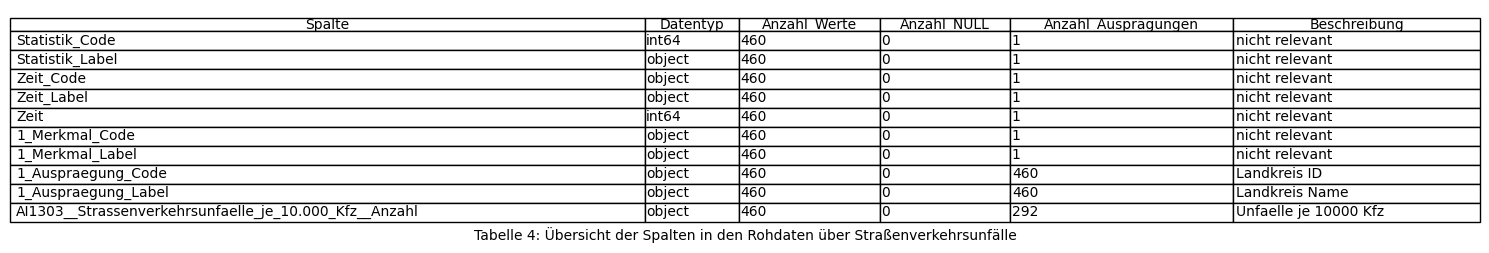

In [5]:
create_info_figure(df_svu, 'Tabelle 4: Übersicht der Spalten in den Rohdaten über Straßenverkehrsunfälle')

### Datenbereinigung und Vorverarbeitung

- relevante Spaltennamen werden gemäß Tabelle 5 (neuer Spaltenname) umbenannt
- Datentypen werden gemäß Tabelle 5 (Datentyp) festgelegt

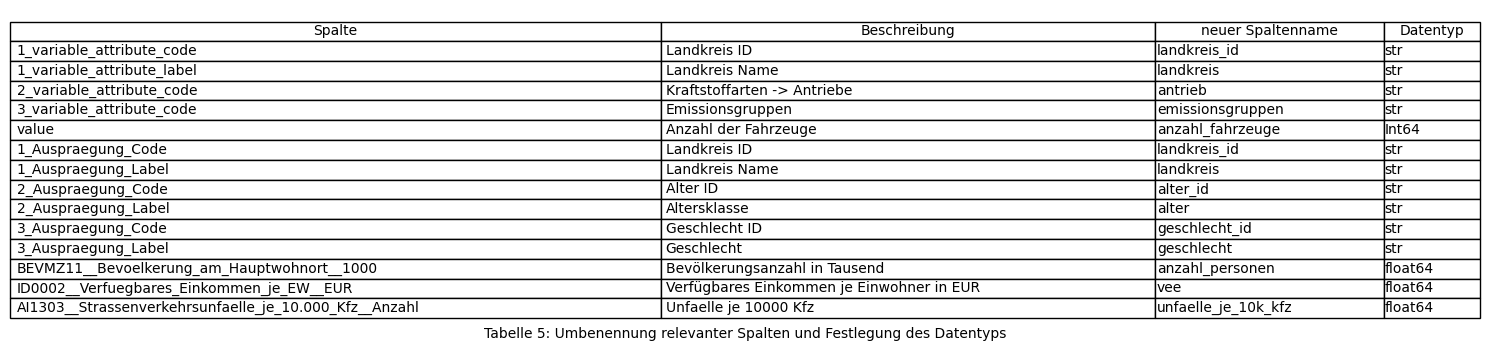

In [6]:
df_relevant_cols = pd.DataFrame(relevant_cols)
df_relevant_cols.columns = ["Spalte", "Beschreibung", "neuer Spaltenname", "Datentyp"]
create_table_figure(df_relevant_cols, 'Tabelle 5: Umbenennung relevanter Spalten und Festlegung des Datentyps')

- Spaltenwerte werden standardisiert, was die Transformation und das Zusammenfügen der Daten vereinfachen wird.
    - führende Nullen werden aus den `landkreis_id` in allen Datensätzen entfernt.
    - Werte in den Spalten `antrieb` und `emissionsgruppen` werden in Kleinbuchstaben konvertiert.
    - Präfixe und `-` Zeichen werden aus den Spalten `antrieb` und `emissionsgruppen` entfernt.
    - In der Spalte `antrieb` wird `sonst` durch `sonstigeantriebe` ersetzt.
    - In der Spalte `emissionsgruppen` wird `sonst` durch `sonstigeemissionsgruppen` ersetzt.
    - In der Spalte `emissionsgruppen` wird `euro6r` durch `euro6` ersetzt.

- Relevante Zeilen filtern & Umgang mit fehlenden Daten
    - Alle Zeilen mit NaN-Werten werden aus dem `df_kfz` Datensatz entfert (betrifft nur die aggregierten Zeilen).
    - Alle Zeilen von Landkreisen mit einer Gebietsreform werden aus dem `df_kfz` Datensatz entfert (`landkreis`-Wert endet beispielsweise mit "(bis 03.09.2011)").
    - Nur die Zeilen mit der Gesamteinwohnerzahl im Datensatz `df_pop` behalten (alter_id und geschlecht_id sind NaN). Damit wird Granularität aufgegeben, aber in den meisten Datensätzen sind die Einwohnerzahlen ohnehin nicht nach Geschlecht und Altergruppe aufgeschlüsselt.

- Transformation und Zusammenfügen der Datensätze
    - Pivotierung und Summierung des KFZ-DataFrame `df_kfz`
    - Zusammenführen der Datensätze mit Hilfe der `landkreis_id`
    - Nachbearbeitung des zusammengefügten Datensatzes: Suche nach Daten, die aufgrund inkonsistenter `landkreis_id` nicht gemerged werden konnten.

Der zusammengeführte Datensatz `df_merged` enthält folgende Informationen:
- 399 Landkreise mit 83 Merkmalen
- 78 Merkmale haben den Datentyp Integer (Ganzzahlen)
- 4 Merkmale haben den Datentyp Float (Dezimalzahlen)
- Die Landkreisnamen sind als Texte (object) gespeichert
- Alle Datenfelder sind vollständig gefüllt, außer die Einwohnerzahlen (anzahl_personen_1000) und die daraus abgeleitete Kennzahl Fahrzeuge pro Person (anzahl_kfz_je_person), die nur für 216 Landkreise vorliegen.

In [7]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 83 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   landkreis_id                               399 non-null    int64  
 1   landkreis                                  399 non-null    object 
 2   benzin_euro1                               399 non-null    int64  
 3   benzin_euro2                               399 non-null    int64  
 4   benzin_euro3                               399 non-null    int64  
 5   benzin_euro4                               399 non-null    int64  
 6   benzin_euro5                               399 non-null    int64  
 7   benzin_euro6                               399 non-null    int64  
 8   benzin_euro6d                              399 non-null    int64  
 9   benzin_euro6dt                             399 non-null    int64  
 10  benzin_sonstigeemissionsgr

### Kurzer Einblick in die Daten

Im Folgenden wird ein kurzer Einblick in die Daten gegeben. Ziel ist es, die Hauptmerkmale der Daten zu beschreiben und einen Überblick über die Daten zu geben. Dies umfasst die Verteilung der Fahrzeugbestände nach Antriebsarten, und die Verteilung der Emissionsgruppen. Durch diese erste Betrachtung können Auffälligkeiten und Hypothesen über mögliche Zusammenhänge aufgestellt werden.
Zur besseren Handhabung und für das nachfolgende Diagramm "Fahrzeugbestand nach Antriebsart und Landkreis" wurde der obige Datensatz `df_merged` gruppiert und geteilt.

In [8]:
chart_antriebe

alt.Chart(...)

Die Gesamthöhe der Balken zeigt die die Gesamtanzahl der zugelassenen Fahrzeuge je Landkreis. Zusätzlich ist die Unterteilung in Antriebsarten sichtbar. Es ist zu vermuten, dass die Einwohnerzahlen eine Rolle spielt, da Berlin die höchste Anzahl zugelassener Fahrzeuge aufweist. Eine Normalisierung analog zur bereits vorliegenden Kennzahl "Fahrzeuge pro Person" (`anzahl_kfz_je_person`), die jedoch nur für 216 Landkreise vorliegt (da der Datensatz unvollständig ist), wäre naheliegend, steht aber nicht im Fokus der Forschungsfrage. Vielmehr soll die Anzahl der Fahrzeuge dahingehend normalisiert werden, dass die Aufteilungen nach Antriebsart und Emissionsgruppen analysiert werden können.

In [9]:
chart_antriebe_prozent

alt.Chart(...)

In den Antriebsarten sind unterschiedliche Anteile zu erkennen. Benzin- und Dieselfahrzeuge dominieren, während andere Antriebe kaum eine Rolle spielen. Auffällig ist der im Vergleich hohe Anteil an Elektrofahrzeugen in Weimar, der wahrscheinlich auf fehlerhafte Daten zurückzuführen ist (siehe [hier](https://www.eisenachonline.de/thueringen/die-meisten-e-autos-in-thueringen-fahren-in-erfurt-die-wenigsten-sind-in-suhl-unterwegs-114714?utm_source=chatgpt.com)). Methodisch wird dieser Umstand später im Kapitel Methodik behandelt, um den Umgang mit Ausreißern zu erläutern. Zudem fällt Ingolstadt durch einen vergleichsweise hohen Hybrid-Anteil auf.

In [10]:
chart_eg_prozent

alt.Chart(...)

Im Diagramm "Fahrzeugbestand nach Emissionsgruppe und Landkreis" lassen sich interessante Entwicklungen erkennen. Der Dieselgate-Skandal, der im September 2015 öffentlich wurde, als die US-Umweltschutzbehörde (EPA) feststellte, dass Volkswagen Software zur Manipulation von Emissionstests verwendet hatte, führte zu einem weltweiten Skandal und lenkte die Aufmerksamkeit auf die tatsächlichen Emissionen von Dieselfahrzeugen.

**Einführung der EURO 6d-TEMP Norm**

Im September **2017** trat die EURO 6d-TEMP Norm in Kraft. Diese Norm beinhaltete strengere Emissionsgrenzwerte und die Einführung von Real Driving Emissions (RDE) Tests, die Emissionen unter realen Fahrbedingungen messen. Die Einführung der EURO 6d-TEMP Norm erfolgte als Zwischenstufe zur vollständigen Umsetzung der EURO 6d Norm. Hier sind die Hauptgründe dafür:

 - Übergangsphase für Hersteller: Die EURO 6d-TEMP Norm bot den Fahrzeugherstellern eine Übergangsphase, um sich auf die strengeren Anforderungen der EURO 6d Norm vorzubereiten. Dies ermöglichte es den Herstellern, ihre Fahrzeuge und Produktionsprozesse schrittweise anzupassen.
 - Einführung von RDE-Tests: Mit EURO 6d-TEMP wurden die Real Driving Emissions (RDE) Tests eingeführt, die Emissionen unter realen Fahrbedingungen messen. Diese Tests waren neu und erforderten von den Herstellern Anpassungen und Validierungen, um sicherzustellen, dass ihre Fahrzeuge die neuen Anforderungen erfüllen.
 - Technologische Anpassungen: Die Einführung von EURO 6d-TEMP gab den Herstellern Zeit, die notwendigen technologischen Anpassungen vorzunehmen, um die strengeren Emissionsgrenzwerte zu erreichen. Dies beinhaltete die Entwicklung und Implementierung neuer Abgasnachbehandlungssysteme und anderer technischer Lösungen.
 - Regulatorische Klarheit: Die schrittweise Einführung half, regulatorische Klarheit zu schaffen und sicherzustellen, dass alle Beteiligten, einschließlich der Hersteller und der Zulassungsbehörden, die neuen Anforderungen und Testverfahren vollständig verstehen und umsetzen konnten.

**Einführung der EURO 6d Norm**

Im Januar **2020** trat die EURO 6d Norm in Kraft und ersetzte die EURO 6d-TEMP Norm. Diese Norm setzte noch strengere Emissionsgrenzwerte und erforderte die vollständige Einhaltung der RDE-Tests.

**Zusammenhang**

Der Dieselgate-Skandal führte zu einem erheblichen Vertrauensverlust in die Emissionsangaben der Automobilhersteller und machte deutlich, dass die bisherigen Labortests nicht ausreichten, um die tatsächlichen Emissionen von Fahrzeugen im realen Fahrbetrieb zu erfassen. Dies erhöhte den Druck auf Regulierungsbehörden und Gesetzgeber, strengere und realistischere Emissionsvorschriften einzuführen.

Die Einführung der EURO 6d-TEMP Norm war eine direkte Reaktion auf diese Erkenntnisse. Die Norm zielte darauf ab, die Diskrepanz zwischen den Emissionen im Labor und im realen Fahrbetrieb zu verringern, indem sie die RDE-Tests einführte. Diese Tests sollten sicherstellen, dass Fahrzeuge auch unter realen Fahrbedingungen die Emissionsgrenzwerte einhalten.

Die hohen Anteile von EURO 6d-TEMP Fahrzeugen (`euro6dt`) in Wolfsburg und Ingolstadt (aber auch in weiteren Städten mit Autoproduktion) könnten damit in Zusammenhang stehen. Es ist wichtig zu beachten, dass es sich bei den dargestellten Daten um das Jahr 2019 handelt und deshalb noch kaum Euro 6d Fahrzeuge in den Daten vorhanden sind.

Die Ansiedlung der OEMs in diesen Landkreisen kann ebenfalls eine bedeutende Rolle spielen. In Regionen wie Wolfsburg und Ingolstadt, wo große Automobilhersteller ansässig sind, werden viele Firmen- und Erprobungsfahrzeuge zugelassen. Zudem könnten die Einkommensverhältnisse und der hohe Anteil der Bevölkerung, die beruflich mit der Automobilbranche verbunden sind, dazu beitragen, dass dort überdurchschnittlich viele Fahrzeuge der neuesten Emissionsnormen zu finden sind.

<div align="center">

| Abgasnorm     | Einführungsjahr | Wichtigste Festlegungen                                                                 | Umweltplakette  |
|---------------|-----------------|----------------------------------------------------------------------------------------|-----------------|
| EURO 1        | 1992            | Erste Einführung von Katalysatoren und Begrenzung von CO, HC, NOx und PM                | Keine           |
| EURO 2        | 1996            | Strengere Grenzwerte für CO, HC, NOx und PM                                             | Gelb            |
| EURO 3        | 2000            | Einführung von OBD (On-Board-Diagnose) und strengere Grenzwerte                         | Gelb            |
| EURO 4        | 2005            | Weitere Verschärfung der Grenzwerte und Einführung von Partikelfiltern für Dieselfahrzeuge | Grün            |
| EURO 5        | 2009            | Noch strengere Grenzwerte und Einführung von Partikelfiltern für Benzinfahrzeuge        | Grün            |
| EURO 6        | 2014            | Erneute Verschärfung der Grenzwerte und Einführung von SCR-Systemen für Dieselfahrzeuge | Grün            |
| EURO 6d-TEMP  | 2017            | Einführung von Real Driving Emissions (RDE) Tests und strengere Grenzwerte              | Grün            |
| EURO 6d       | 2020            | Vollständige Einhaltung der RDE-Tests und noch strengere Grenzwerte                     | Grün            |
| EURO 7        | 2025 (geplant)  | Weitere Verschärfung der Emissionsgrenzwerte und Einführung neuer Testverfahren         | Grün            |

<p style="text-align: center; font-size: 0.9em;">Tabelle 6: Übersicht der Einführung europäischer Abgasnormen und deren wichtigste Festlegungen.</p>

</div>

### Datenwörterbuch
Ein Datenwörterbuch ist ein unverzichtbares Werkzeug in der Datenanalyse, da es eine strukturierte Übersicht über die in einem Datensatz enthaltenen Variablen und deren Eigenschaften bietet. Es hilft dabei, die Bedeutung, den Typ und die Rolle jeder Variable zu verstehen, was besonders wichtig für die Explorative Datenanalyse (EDA) und die Modellierung ist. In Tabelle 7 ist das Datenwörterbuch zu sehen, das eine Auswahl von Features enthält, die für die EDA und Modellierung von Relevanz sein könnten.

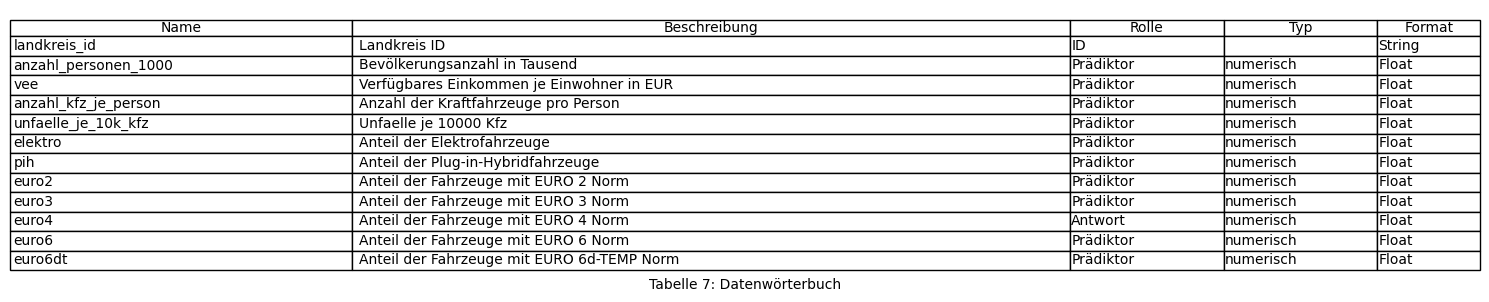

In [11]:
create_table_figure(df_data_dictionary, 'Tabelle 7: Datenwörterbuch')

### Explorative Datenanalyse

Die explorative Datenanalyse (EDA) bietet einen ersten Einblick in die Struktur und Eigenschaften der Daten. Dabei werden Verteilungen, Auffälligkeiten und Beziehungen zwischen Variablen untersucht. Der Fokus liegt auf der Zielvariable sowie relevanten Prädiktorvariablen, um grundlegende Muster und Zusammenhänge zu identifizieren. Visualisierungen und zusammenfassende Statistiken unterstützen die Darstellung der wichtigsten Erkenntnisse.

#### Zusammengefasste Statistik

Tabelle 8 fasst grundlegende statistische Informationen für jede numerische Spalte aus dem Datenwörterbuch zusammen, wie z.B. Mittelwert, Standardabweichung, Minimum, Maximum und Quartile.

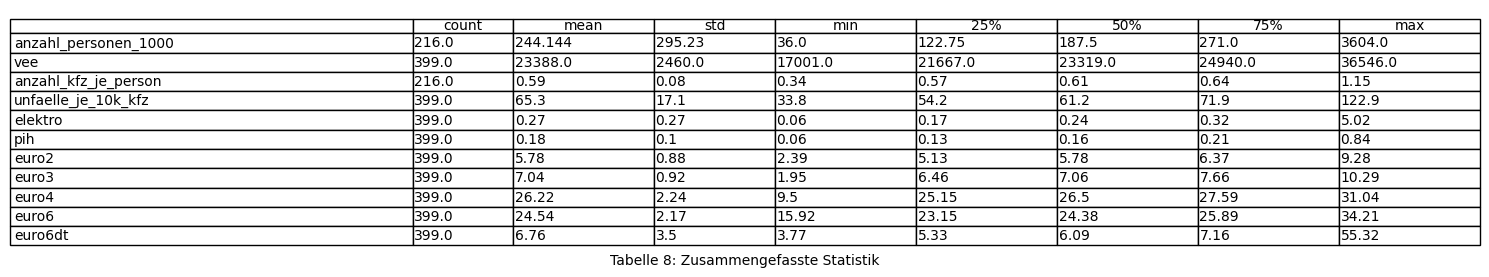

In [12]:
create_table_figure(df_regr.describe().round(
    {'anzahl_personen_1000': 3, 'vee': 0, 'anzahl_kfz_je_person': 2, 'unfaelle_je_10k_kfz': 1,
     'elektro': 2, 'pih': 2, 'euro2': 2, 'euro3': 2, 'euro4': 2, 'euro6': 2, 'euro6dt': 2}
     ).T.reset_index().rename(columns={'index': ''}),
     'Tabelle 8: Zusammengefasste Statistik')

**Analyse der Statistik - Schritt für Schritt**

1. **Datenverfügbarkeit**
- Bereits erwähnt wurde, dass für `anzahl_personen_1000` und `anzahl_kfz_je_person` nur 216 von 399 Beobachtungen vorliegen
- Alle anderen Kennzahlen sind für alle 399 Landkreise verfügbar

2. **Bevölkerungsstruktur (`anzahl_personen_1000`)**
- Große Unterschiede in der Einwohnerzahl: von 36.000 bis 3.604.000 Einwohner
- Starke Streuung (Standardabweichung 295.230 vs. Mittelwert 244.144)
- Rechtsschiefe Verteilung: Median (187.500) deutlich kleiner als Mittelwert (244.144)

3. **Verfügbares Einkommen (`vee`)**
- Durchschnittlich 23.388 EUR pro Einwohner
- Relativ gleichmäßige Verteilung (geringe Standardabweichung im Verhältnis zum Mittelwert)
- Spannweite von 17.001 EUR bis 36.546 EUR

4. **Fahrzeugdichte (`anzahl_kfz_je_person`)**
- Im Durchschnitt etwa 0,59 Fahrzeuge pro Person
- Relativ homogen über die Landkreise (geringe Standardabweichung)
- Einzelne Ausreißer nach oben (Maximum 1,15 Fahrzeuge pro Person)

5. **Unfallhäufigkeit (`unfaelle_je_10k_kfz`)**
- Durchschnittlich 65,3 Unfälle je 10.000 Fahrzeuge
- Große Unterschiede zwischen den Landkreisen (33,8 bis 122,9)
- Leicht rechtsschiefe Verteilung

6. **Antriebsarten (`elektro`, `pih`)**
- Sehr geringer Anteil alternativer Antriebe
- Elektrofahrzeuge: durchschnittlich 0,27% (max. 5,02%)
- Plug-in-Hybride: durchschnittlich 0,18% (max. 0,84%)

7. **Emissionsklassen (`euro2` bis `euro6dt`)**
- Dominanz von Euro4 (∅ 26,22%) und Euro6 (∅ 24,54%)
- Geringere Anteile bei Euro2 (∅ 5,78%) und Euro3 (∅ 7,04%)
- Euro6dt mit großer Streuung (Standardabweichung 3,5)

Diese Statistik zeigt deutliche regionale Unterschiede in der Bevölkerungsstruktur und im Fahrzeugbestand, wobei alternative Antriebe noch eine untergeordnete Rolle spielen.

#### Visualisierung der Verteilungen durch Histogramme, Boxplots, Dichteverteilung

Die obige zusammengefasste Statistik deutet auf unterschiedliche Verteilungsformen in den Kennzahlen hin. Diese sollen nun durch Histogramme, Boxplots und Dichteverteilungen näher untersucht und belegt werden. Die grafischen Darstellungen werden diese Vermutungen bestätigen oder widerlegen und zusätzliche Details der Verteilungen aufzeigen.

Ein **kombiniertes Histogramm und Boxplot Diagramm** ermöglicht zwei komplementäre Sichtweisen auf die Datenverteilung:
- Das **Histogramm** zeigt die Häufigkeitsverteilung der Werte in Klassen (Bins) und visualisiert damit die Form der Verteilung.
- Der **Boxplot** fasst die wichtigsten Lagemaße zusammen: Median (mittlere Linie), 25%- und 75%-Quartile (Box), Whisker (1,5-facher Interquartilsabstand) sowie Ausreißer (einzelne Punkte).

In [13]:
create_distribution_plot(df=df_regr, column_name='euro4', observation_label="Landkreise", xmin=8, xmax=32)

alt.VConcatChart(...)

Die Visualisierung der euro4-Emissionsklasse zeigt:
- Das Histogramm offenbart eine annähernd normalverteilte Form mit leichter Linksschiefe
- Der zentrale Bereich (Box) liegt zwischen 25,15% und 27,59%
- Der Median bei 26,50% teilt die Box nahezu symmetrisch
- Ausreißer treten hauptsächlich am unteren Ende der Verteilung auf (unter 20%)
- Die Hauptmasse der Werte konzentriert sich im Bereich von 24% bis 28%

Diese kombinierte Darstellung bestätigt die gleichmäßige Verteilung der `euro4`-Fahrzeuge über die Landkreise, mit einzelnen Ausnahmen bei kleineren Anteilen.

Eine **Dichteverteilung** (auch Kerndichteschätzung oder KDE-Plot) zeigt die kontinuierliche Wahrscheinlichkeitsverteilung einer Variable. Im Gegensatz zum Histogramm, das diskrete Häufigkeiten in Klassen darstellt, visualisiert die Dichteverteilung einen geglätteten Verlauf der Datenverteilung. Die Fläche unter der Kurve summiert sich zu 1, wodurch die relative Häufigkeit von Wertebereichen direkt ablesbar ist.

In [14]:
create_density_plot(df=df_regr, column_name='euro4', observation_label="euro4 Anteile", xmin=8, xmax=32)

alt.Chart(...)

Bei der Emissionsklasse `euro4` zeigt die Dichteverteilung eine annähernd symmetrische, glockenförmige Kurve um den Mittelwert von 26,22%. Die moderate Standardabweichung von 2,24 spiegelt sich in der kompakten Form der Verteilung wider. Der Großteil der Werte liegt zwischen 25,15% (25. Perzentil) und 27,59% (75. Perzentil), was auf eine homogene Verteilung dieser Emissionsklasse über die Landkreise hinweist. Extreme Ausreißer sind selten, die Spannweite reicht circa von minimal 9,5% bis maximal 31%.

#### Scatterplots

Scatterplots sind ein wesentliches Werkzeug in der Explorativen Datenanalyse (EDA), da sie es ermöglichen, die Beziehung zwischen zwei kontinuierlichen Variablen visuell darzustellen. Durch die Erstellung von Scatterplots können Muster, Trends und Ausreißer in den Daten identifiziert werden. Dies ist besonders nützlich in der Vorbereitung eines multiplen linearen Modells, da Scatterplots helfen, die lineare Beziehung zwischen den Prädiktorvariablen und der Zielvariable zu beurteilen. Ein klarer linearer Trend in einem Scatterplot deutet darauf hin, dass die Variable ein guter Kandidat für das Modell ist. Darüber hinaus können Scatterplots Hinweise auf Multikollinearität geben, wenn starke Korrelationen zwischen den Prädiktorvariablen sichtbar werden. Insgesamt bieten Scatterplots eine intuitive Möglichkeit, die Struktur und Verteilung der Daten zu verstehen, was die Auswahl und Transformation der Variablen für das Modell erleichtert.

In [15]:
create_scatterplot_grid(df_regr,  width=100, height=100)

alt.RepeatChart(...)

Zusammenhänge für `euro4`-Emissionsklassen

- Mit anderen Emissionsklassen
   - Negative Korrelation mit `euro6`/`euro6dt` (Substitutionseffekt)
   - Positive Korrelation mit `euro3` (ähnliches Fahrzeugalter)
   - Schwächere Korrelation mit `euro2` (älter)

- Mit alternativen Antrieben
   - Negative Korrelation mit `elektro`/`pih` (neue vs. alte Technologie)

- Mit sozioökonomischen Faktoren
   - Negative Korrelation mit `vee` (verfügbares Einkommen)
   - Schwache Korrelation mit `unfaelle_je_10k_kfz`

Die Streudiagramme zeigen allgemein:
- Klare lineare Beziehungen zu anderen Emissionsklassen zeigen
- Schwächere, aber erkennbare Zusammenhänge mit sozioökonomischen Faktoren
- Diffuse Punktwolken bei nicht korrelierten Variablen

Die explorative Datenanalyse zeigt bereits erste Hinweise auf mögliche Zusammenhänge zwischen den verschiedenen Merkmalen. Diese Korrelationen werden im Kapitel Methodik systematisch untersucht, um geeignete Prädiktoren für das multiple lineare Regressionsmodell zu identifizieren. Die Auswahl der Features erfolgt dabei nicht nur auf Basis der statistischen Zusammenhänge, sondern berücksichtigt auch inhaltliche Überlegungen zur Vermeidung von Multikollinearität.

## Methodology

> REMOVE THE FOLLOWING TEXT

This section includes a brief description of your modeling process.

Explain the reasoning for the type of model you're fitting, predictor variables considered for the model.

Additionally, show how you arrived at the final model by describing the model selection process, variable transformations (if needed), assessment of conditions and diagnostics, and any other relevant considerations that were part of the model fitting process.

## Results

> REMOVE THE FOLLOWING TEXT

This is where you will output the final model with any relevant model fit statistics.

Describe the key results from the model.
The goal is not to interpret every single variable in the model but rather to show that you are proficient in using the model output to address the research questions, using the interpretations to support your conclusions.

Focus on the variables that help you answer the research question and that provide relevant context for the reader.


## Discussion + Conclusion


> REMOVE THE FOLLOWING TEXT

In this section you'll include a summary of what you have learned about your research question along with statistical arguments supporting your conclusions.
In addition, discuss the limitations of your analysis and provide suggestions on ways the analysis could be improved.
Any potential issues pertaining to the reliability and validity of your data and appropriateness of the statistical analysis should also be discussed here.
Lastly, this section will include ideas for future work.